In [1]:
from sklearn.datasets import load_breast_cancer,load_diabetes

In [2]:
cancer=load_breast_cancer()
diabetes=load_diabetes()

In [3]:
X1=cancer.data
y1=cancer.target

X2=diabetes.data
y2=diabetes.target

In [4]:
import pandas as pd

df1=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df1['target']=cancer.target
df2=pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df2['target']=diabetes.target


In [5]:
df1.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
23,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.109700,0.086320,0.1769,0.05278,...,35.59,188.00,2615.0,0.14010,0.26000,0.315500,0.20090,0.2822,0.07526,0
499,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,0.1848,0.06222,...,30.76,163.20,1760.0,0.14640,0.35970,0.517900,0.21130,0.2480,0.08999,0
192,9.72,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.000000,0.00000,0.1909,0.06559,1
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.048350,0.1495,0.05593,...,25.45,117.20,1009.0,0.13380,0.16790,0.166300,0.09123,0.2394,0.06469,1
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289,1


In [6]:
df1.shape

(569, 31)

In [7]:
df2.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
320,-0.023677,-0.044642,0.030440,-0.005670,0.082364,0.092004,-0.017629,0.071210,0.033043,0.003064,122.0
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025953,-0.001078,83.0
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096435,-0.034215,55.0
199,0.041708,-0.044642,-0.045007,0.034508,0.043837,-0.015719,0.037595,-0.014401,0.089897,0.007207,90.0
165,-0.041840,-0.044642,-0.066563,-0.046985,-0.037344,-0.043276,0.048640,-0.039493,-0.056153,-0.013504,59.0


Linear regresssion

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=42,test_size=0.3)

In [11]:
model.fit(X1_train,y1_train)

LinearRegression()

In [12]:
y1_pred=model.predict(X1_test)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
print(f"MAE :{mean_absolute_error(y1_test,y1_pred)}")
print(f"MSE :{mean_squared_error(y1_test,y1_pred)}")
print(f"r2 score :{r2_score(y1_test,y1_pred)}")

MAE :0.20007348217357568
MSE :0.06728376859363167
r2 score :0.7108399944964163


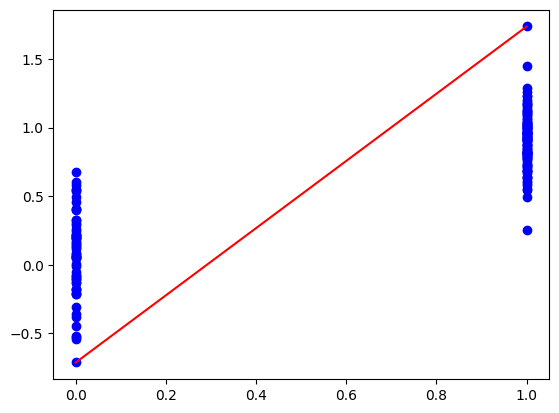

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y1_test,y1_pred,c='b')
plt.plot([y1_test.min(),y1_test.max()],[y1_pred.min(),y1_pred.max()],c='r')

stochastic gradient descent

In [16]:
from sklearn.linear_model import SGDRegressor

reg=SGDRegressor(max_iter=1000,learning_rate='adaptive',eta0=0.01)

In [17]:
reg.fit(X1_train,y1_train)

SGDRegressor(learning_rate='adaptive')

In [18]:
reg_pred=reg.predict(X1_test)

In [19]:
print(f"MAE :{mean_absolute_error(y1_test,reg_pred)}")
print(f"MSE :{mean_squared_error(y1_test,reg_pred)}")
print(f"r2 score :{r2_score(y1_test,reg_pred)}")

MAE :35906702862991.87
MSE :2.18986553210559e+27
r2 score :-9.411207822501405e+27


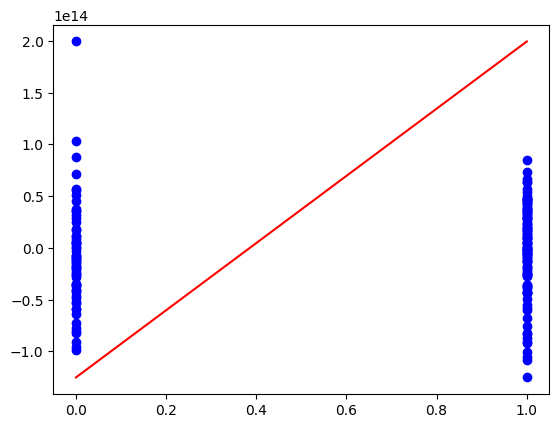

In [20]:


plt.scatter(y1_test,reg_pred,c='b')
plt.plot([y1_test.min(),y1_test.max()],[reg_pred.min(),reg_pred.max()],c='r')


mini batch gradient descent

MAE: 41.89
MSE: 2828.94
R²: 0.48


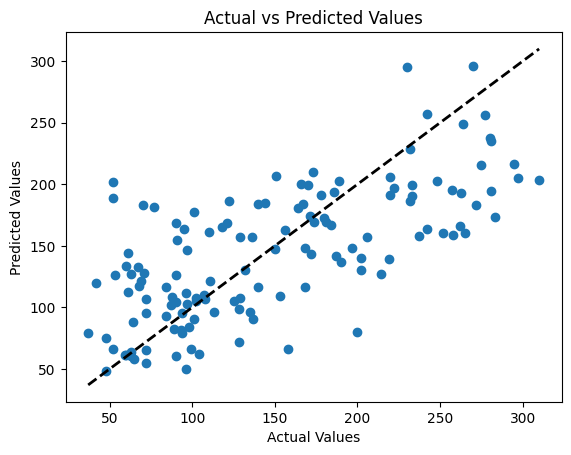

In [21]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X1 = diabetes.data  # Features
y1 = diabetes.target  # Target variable

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Set parameters for mini-batch gradient descent
batch_size = 20
n_epochs = 50
n_iterations = int(np.ceil(X1_train.shape[0] / batch_size))

# Initialize the SGD regressor
sgd_regressor = SGDRegressor(max_iter=1, tol=None, warm_start=True, random_state=42)

# Perform mini-batch gradient descent
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(X1_train.shape[0])
    X1_train_shuffled = X1_train[shuffled_indices]
    y1_train_shuffled = y1_train[shuffled_indices]
    
    for i in range(0, X1_train.shape[0], batch_size):
        X1_batch = X1_train_shuffled[i:i+batch_size]
        y1_batch = y1_train_shuffled[i:i+batch_size]
        sgd_regressor.partial_fit(X1_batch, y1_batch)

# Make predictions on the test set
y1_pred = sgd_regressor.predict(X1_test)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Optional: Plot actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
plt.show()
